In [2]:
import pandas as pd

In [4]:
user_details = pd.read_excel('/content/sample_data/userdetails.xlsx')
cooking_sessions = pd.read_excel('/content/sample_data/cookingsessions_data.xlsx')
order_details = pd.read_excel('/content/sample_data/order_details_table.xlsx')

In [5]:
user_details_preview = user_details.head()
cooking_sessions_preview = cooking_sessions.head()
order_details_preview = order_details.head()

user_details_preview, cooking_sessions_preview, order_details_preview

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

In [6]:
# Check for missing values and duplicates in each dataset
user_details_info = {
    "missing_values": user_details.isnull().sum(),
    "duplicates": user_details.duplicated().sum()
}
user_details_info

{'missing_values': User ID              0
 User Name            0
 Age                  0
 Location             0
 Registration Date    0
 Phone                0
 Email                0
 Favorite Meal        0
 Total Orders         0
 dtype: int64,
 'duplicates': 0}

In [7]:
cooking_sessions_info = {
    "missing_values": cooking_sessions.isnull().sum(),
    "duplicates": cooking_sessions.duplicated().sum()
}
cooking_sessions_info

{'missing_values': Session ID         0
 User ID            0
 Dish Name          0
 Meal Type          0
 Session Start      0
 Session End        0
 Duration (mins)    0
 Session Rating     0
 dtype: int64,
 'duplicates': 0}

In [ ]:
order_details_info = {
    "missing_values": order_details.isnull().sum(),
    "duplicates": order_details.duplicated().sum()
}
order_details_info

# 1. Cleaning and Merging the Data
# We merge the UserDetails, CookingSessions, and OrderDetails tables.

In [10]:
# Merge CookingSessions with OrderDetails on 'Session ID'
cooking_order_merged = cooking_sessions.merge(order_details, on='Session ID')

# Check column names of cooking_order_merged
print(cooking_order_merged.columns)



Index(['Session ID', 'User ID_x', 'Dish Name_x', 'Meal Type_x',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Order ID', 'User ID_y', 'Order Date', 'Meal Type_y', 'Dish Name_y',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')


In [14]:
# Merge the above with UserDetails on 'User ID' or the modified column name
# Replace 'User ID_x' below with the correct column name from the previous print statement
full_data = cooking_order_merged.merge(user_details, left_on='User ID_x', right_on='User ID')

# Display the merged data
print(full_data.head())

  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2       S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4       S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  Order ID User ID_y  \
0 2024-12-01 19:30:00               30             4.5      1001      U001   
1 2024-12-01 12:20:00               20             4.0      1002      U002   
2 2024-12-02 20:10:00               40             4.8      1003      U003   
3 2024-12-02 08:00:00               30             4.2      1004      U001   
4 2024-12-03 13:15:00               15             4.7      1005      U004   

   ... Rating User ID      User Name Age       Location Registration Date  \
0  

# 2. Analyze the Relationship Between Cooking Sessions and User Orders
# Check how many sessions resulted in completed orders:

In [15]:
# Calculate the number of completed orders
completed_orders = full_data[full_data['Order Status'] == 'Completed']
print("Total Sessions:", len(full_data))
print("Completed Orders:", len(completed_orders))



Total Sessions: 10
Completed Orders: 9


In [18]:
# Calculate the percentage of completed orders
completion_rate = len(completed_orders) / len(full_data) * 100
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 90.00%


In [19]:
#Compare session ratings with order ratings:

# Compare average ratings
average_session_rating = full_data['Session Rating'].mean()
average_order_rating = full_data['Rating'].mean()
print(f"Average Session Rating: {average_session_rating:.2f}")
print(f"Average Order Rating: {average_order_rating:.2f}")

Average Session Rating: 4.44
Average Order Rating: 4.38


# 3. Identify Popular Dishes


In [21]:
popular_dishes = full_data['Dish Name_x'].value_counts()
print("Popular Dishes:\n", popular_dishes)

Popular Dishes:
 Dish Name_x
Caesar Salad       2
Spaghetti          1
Grilled Chicken    1
Pancakes           1
Veggie Burger      1
Tacos              1
Fried Rice         1
Omelette           1
Pasta              1
Name: count, dtype: int64


# 4. Explore Demographic Factors

In [22]:
# Count orders by location
location_analysis = full_data['Location'].value_counts()
print("Orders by Location:\n", location_analysis)


Orders by Location:
 Location
New York         3
Los Angeles      2
Chicago          2
San Francisco    2
Seattle          1
Name: count, dtype: int64


# 5. Visualizations

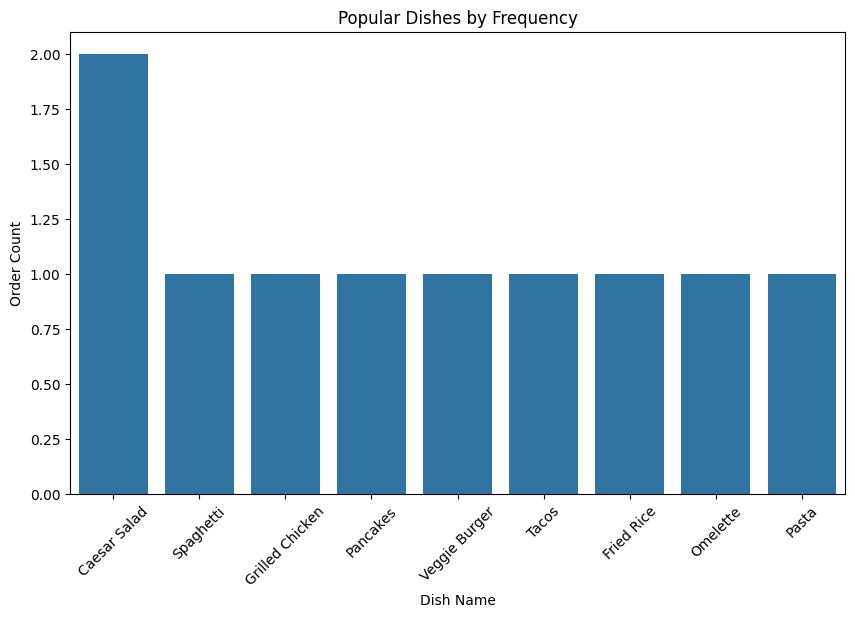

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for popular dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.index, y=popular_dishes.values)
plt.title('Popular Dishes by Frequency')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()




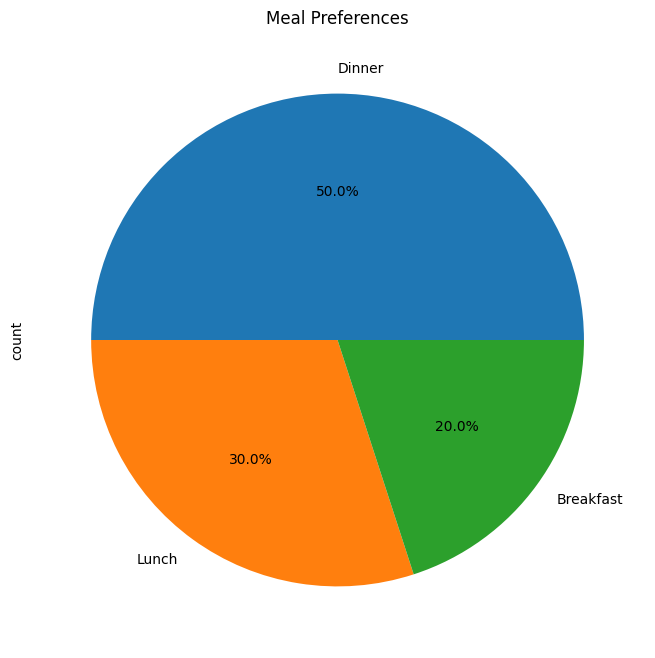

In [27]:
# Pie chart for meal preferences
meal_prefs = full_data['Meal Type_x'].value_counts()
meal_prefs.plot(kind='pie',autopct='%1.1f%%',  figsize=(8, 8), title='Meal Preferences')
plt.show()